In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os
import time

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [5]:
CLASS_NAMES= ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
validation_images, validation_labels = train_images[:5000], train_labels[:5000]

In [4]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))

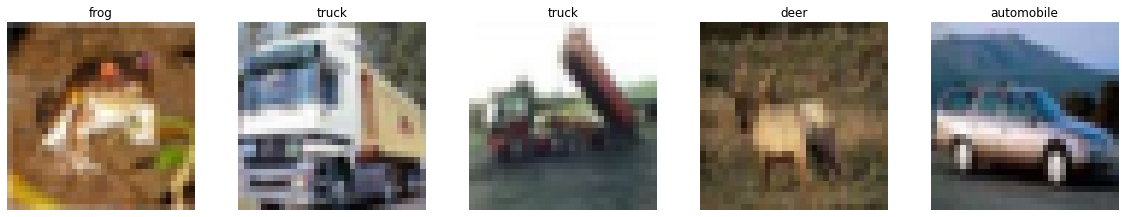

In [6]:
plt.figure(figsize=(20,20))
for i, (image, label) in enumerate(train_ds.take(5)):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(image)
    plt.title(CLASS_NAMES[label.numpy()[0]])
    plt.axis('off')

In [7]:
def augment_images(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
    image = tf.image.per_image_standardization(image)
    # Resize images from 32x32 to 277x277
    image = tf.image.resize(image, (227,227))
    return image, label

In [8]:
train_ds_size = len(list(train_ds))
train_ds_size = len(list(test_ds))
validation_ds_size = len(list(validation_ds))

In [9]:
train_ds = (train_ds
                  .map(augment_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

test_ds = (test_ds
                  .map(augment_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

validation_ds = (validation_ds
                  .map(augment_images)
                  .shuffle(buffer_size=train_ds_size)
                  .batch(batch_size=32, drop_remainder=True))

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")

def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [13]:
model.fit(train_ds,
          epochs=50,
          validation_data=validation_ds,
          validation_freq=1,
          callbacks=[tensorboard_cb])

Train for 1562 steps, validate for 156 steps
Epoch 1/50
1562/1562 [==============================] - 42s 27ms/step - loss: 2.0966 - accuracy: 0.3251 - val_loss: 1.4436 - val_accuracy: 0.4920
Epoch 2/50
1562/1562 [==============================] - 39s 25ms/step - loss: 1.5864 - accuracy: 0.4382 - val_loss: 1.2939 - val_accuracy: 0.5447
Epoch 3/50
1562/1562 [==============================] - 39s 25ms/step - loss: 1.4391 - accuracy: 0.4889 - val_loss: 1.1749 - val_accuracy: 0.5859
Epoch 4/50
1562/1562 [==============================] - 39s 25ms/step - loss: 1.3278 - accuracy: 0.5307 - val_loss: 1.0841 - val_accuracy: 0.6228
Epoch 5/50
1562/1562 [==============================] - 39s 25ms/step - loss: 1.2349 - accuracy: 0.5630 - val_loss: 1.0094 - val_accuracy: 0.6569
Epoch 6/50
1562/1562 [==============================] - 40s 25ms/step - loss: 1.1657 - accuracy: 0.5876 - val_loss: 0.9599 - val_accuracy: 0.6851
Epoch 7/50
1562/1562 [==============================] - 39s 25ms/step - loss: 1

In [15]:
model.evaluate(test_ds)

312/312 [==============================] - 8s 27ms/step - loss: 0.9814 - accuracy: 0.7439


[0.9813630809673132, 0.7438902]

In [ ]:
# Keras Class API of AlexNet

class CustomAlexNet(keras.Model):
    def __init__(self):
        super(CustomAlexNet, self).__init__()
        self.conv1 = keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3))
        self.conv2 = keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same")
        self.conv3 = keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")
        self.conv4 = keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same" )
        self.conv5 = keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same")
        self.bn = keras.layers.BatchNormalization()
        self.maxpool = keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2))
        self.dropout = keras.layers.Dropout(0.5)
        self.flatten_layer = keras.layers.Flatten()
        self.dense_layer = keras.layers.Dense(units=4096, activation='relu')
        self.output_layer = keras.layers.Dense(units=10, activation='softmax')
    
    def call(self, x):
        x = self.conv1(x)
        x = self.bn(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.bn(x)
        x = self.maxpool(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.maxpool(x)
        x = self.dense_layer(x)
        x = self.dropout(x)
        x = self.dense_layer(x)
        x = self.dropout(x)
        x = self.output_layer(x)
        return x

In [ ]:
model = CustomAlexNet()
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.fit(train_ds,
          epochs=30,
          validation_data=validation_ds,
          validation_freq=1,
          callbacks=[tensorboard_cb])